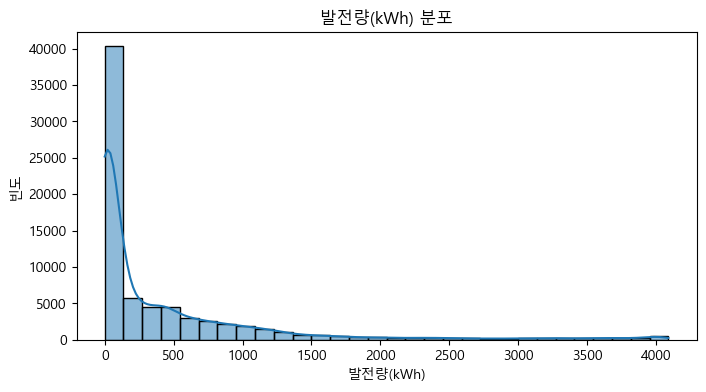

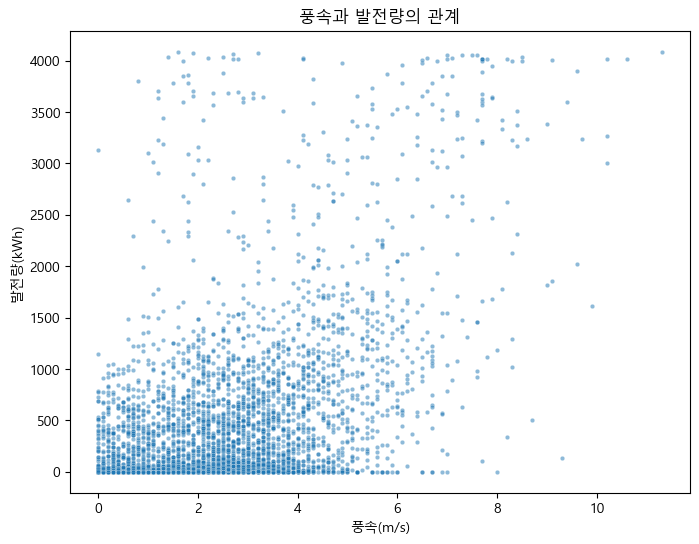

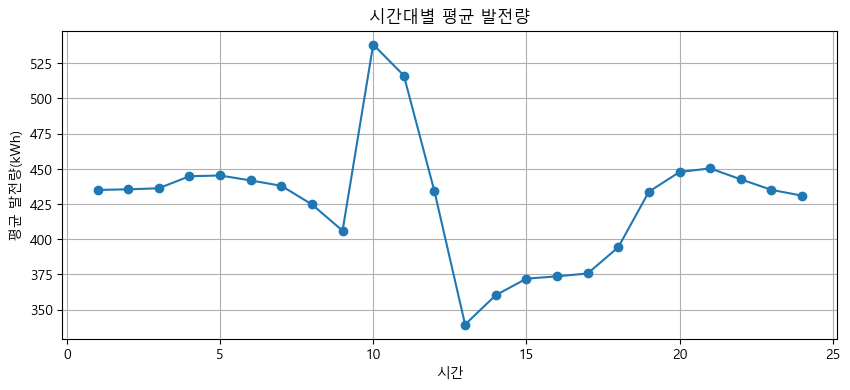

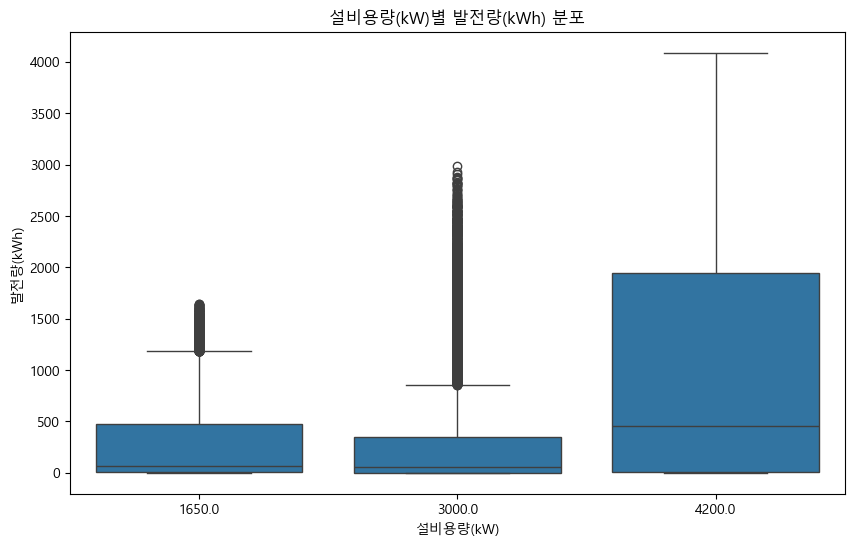

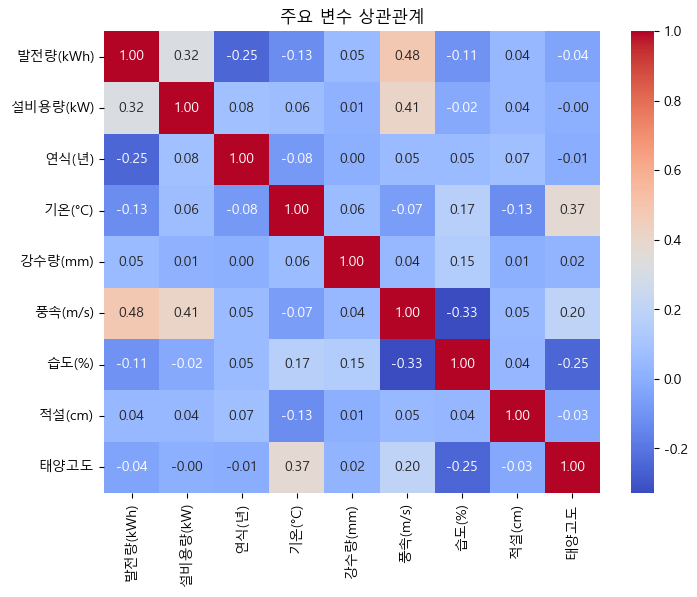

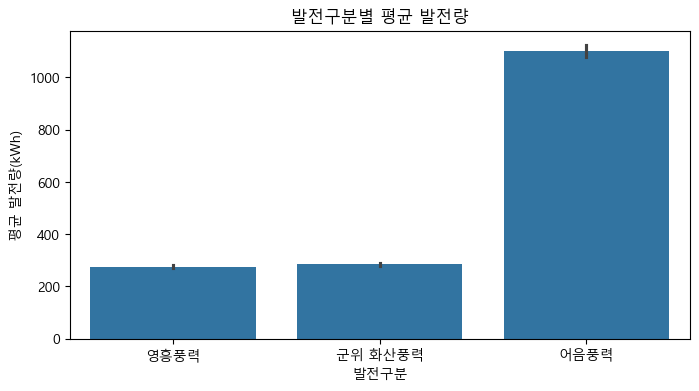

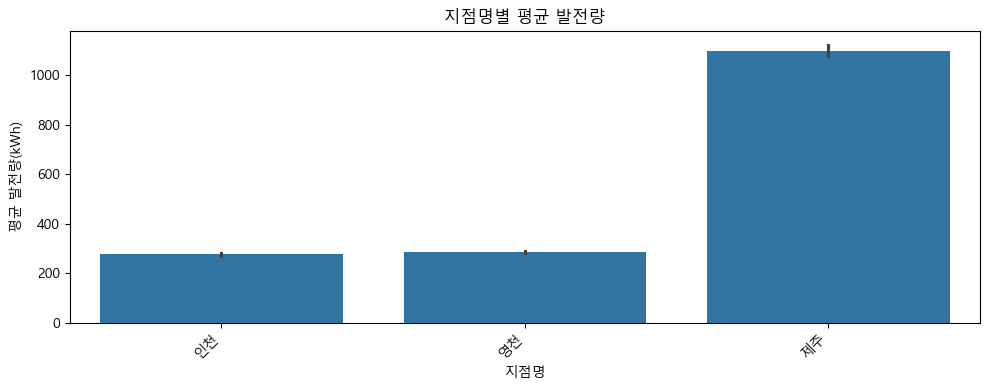

연식(년),0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,...,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9,12.0,12.1
지점명,,,,,,,,,,,,,,,,,,,,,
영천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,264.7,58.7,102.3,111.1,289.7,444.6,511.5,389.4,398.7,114.2
제주,1686.6,1310.1,1053.9,931.8,642.7,416.6,1985.2,312.1,604.7,875.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


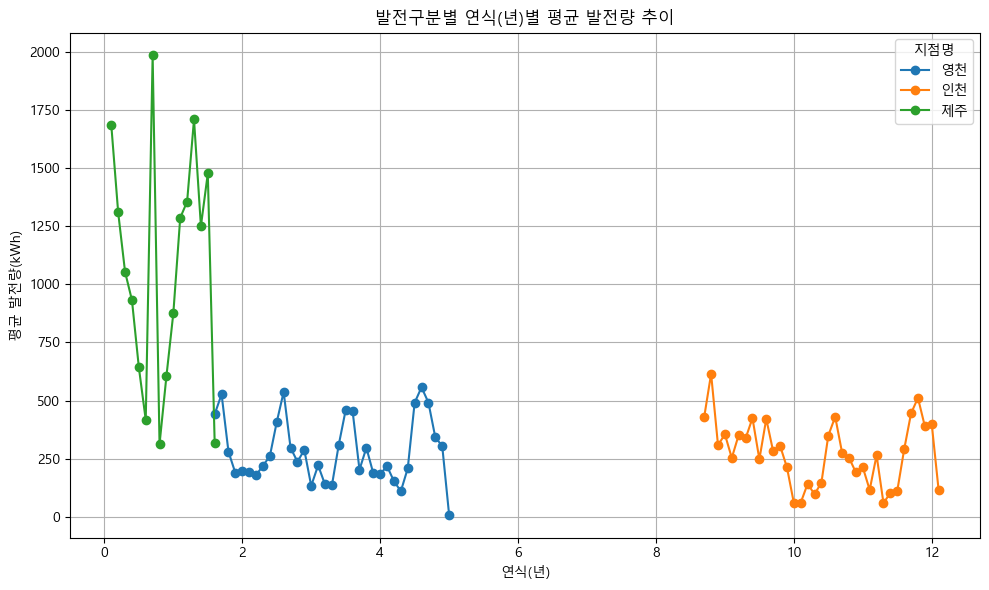

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows용 예시: 'Malgun Gothic')
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 데이터 불러오기
df = pd.read_csv(r'../../data/풍력_전처리_이상치제거.csv')

# 1. 발전량(kWh) 분포
plt.figure(figsize=(8,4))
sns.histplot(df['발전량(kWh)'], bins=30, kde=True)
plt.title('발전량(kWh) 분포')
plt.xlabel('발전량(kWh)')
plt.ylabel('빈도')
plt.show()
plt.close()

# 2. 풍속 vs 발전량 산점도 (샘플링 및 투명도 조정)
plt.figure(figsize=(8,6))
sample_df = df.sample(n=5000, random_state=42) if len(df) > 2000 else df
sns.scatterplot(x='풍속(m/s)', y='발전량(kWh)', data=sample_df, alpha=0.5, s=10)
plt.title('풍속과 발전량의 관계')
plt.xlabel('풍속(m/s)')
plt.ylabel('발전량(kWh)')
plt.show()
plt.close()

# 3. 시간대별 평균 발전량 (시간별 트렌드)
plt.figure(figsize=(10,4))
hourly = df.groupby('시간')['발전량(kWh)'].mean()
hourly.plot(marker='o')
plt.title('시간대별 평균 발전량')
plt.xlabel('시간')
plt.ylabel('평균 발전량(kWh)')
plt.grid(True)
plt.show()
plt.close()

# 4. 설비용량별 발전량 박스플롯 (kW 단위)
plt.figure(figsize=(10,6))
sns.boxplot(x='설비용량(kW)', y='발전량(kWh)', data=df)
plt.title('설비용량(kW)별 발전량(kWh) 분포')
plt.xlabel('설비용량(kW)')
plt.ylabel('발전량(kWh)')
plt.show()
plt.close()


# 6. 주요 변수와 발전량의 상관관계 히트맵
target_cols = ['발전량(kWh)', '설비용량(kW)', '연식(년)', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '태양고도']
cols_exist = [col for col in target_cols if col in df.columns]
if len(cols_exist) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[cols_exist].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('주요 변수 상관관계')
    plt.show()
    plt.close()

# 7. 발전구분별 평균 발전량
plt.figure(figsize=(8,4))
sns.barplot(x='발전구분', y='발전량(kWh)', data=df)
plt.title('발전구분별 평균 발전량')
plt.xlabel('발전구분')
plt.ylabel('평균 발전량(kWh)')
plt.show()
plt.close()

# 8. 지점명별 평균 발전량
plt.figure(figsize=(10,4))
sns.barplot(x='지점명', y='발전량(kWh)', data=df)
plt.title('지점명별 평균 발전량')
plt.xlabel('지점명')
plt.ylabel('평균 발전량(kWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

# 발전구분(지점명)별 연식(년)별 평균 발전량 표 출력
avg_table = df.groupby(['지점명', '연식(년)'])['발전량(kWh)'].mean().unstack().round(1)
display(avg_table)

# 발전구분(지점명)별 연식별 평균 발전량 추이 라인플롯
plt.figure(figsize=(10,6))
for site in avg_table.index:
    plt.plot(avg_table.columns, avg_table.loc[site], marker='o', label=site)
plt.title('발전구분별 연식(년)별 평균 발전량 추이')
plt.xlabel('연식(년)')
plt.ylabel('평균 발전량(kWh)')
plt.legend(title='지점명')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

